# WEATHER DATA

In [ ]:
import pandas as pd

This project focuses on studying climate change pattern using historical weather data from Seattle.The dataset used contains daily weather records over several years, including information such as temperature, precipitation, wind speed and overall weather conditions.It consists 1461 rows and 6 columns.

In [3]:
data=pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
data.shape

(1461, 6)

In [5]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [7]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# LABEL ENCODING

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
j=LabelEncoder()
k=j.fit_transform(data['date'])
l=j.fit_transform(data['weather'])
data['date']=k
data['weather']=l
data

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4


# CORRELATION

In [13]:
data.corr()

,date,precipitation,temp_max,temp_min,wind,weather
date,1.000000,0.014292,0.145827,0.164249,-0.039163,0.067043
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,0.067043,-0.267388,0.322337,0.154981,-0.065858,1.000000


In [14]:
a=data.drop('date',axis='columns')
a

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


# TRAIN_TEST_SPLIT

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=a.drop('weather',axis='columns')
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [17]:
y=a.weather
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)
xtrain,xtest,ytrain,ytest

(      precipitation  temp_max  temp_min  wind
 1067            0.0      10.0       0.0   3.6
 653             0.0      15.6       5.0   0.9
 739             5.8       9.4       5.6   6.3
 1270            0.0      25.6      16.1   2.6
 467             9.7       7.8       4.4   4.6
 ...             ...       ...       ...   ...
 1016            7.6      21.1      10.0   3.1
 165             0.0      17.2      10.0   2.7
 7               0.0      10.0       2.8   2.0
 219             0.0      21.1      15.0   2.6
 1350            0.0      26.7      14.4   2.1
 
 [1168 rows x 4 columns],
       precipitation  temp_max  temp_min  wind
 481             0.0      20.6       8.3   2.2
 606            19.3      23.9      18.3   3.0
 538             0.0      25.6      11.7   1.7
 794            46.7      15.6      10.6   3.9
 1278            0.0      33.9      17.8   3.4
 ...             ...       ...       ...   ...
 1037           10.9      13.9      11.1   4.8
 431             7.4      12.2  

# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [20]:
model1=LogisticRegression(max_iter=1000)
model1.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [21]:
model1.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 3, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4])

In [22]:
model1.score(xtest,ytest)

0.8122866894197952

# SVC

In [23]:
from sklearn.svm import SVC

In [24]:
model2=SVC()
model2.fit(xtrain,ytrain)

SVC()

In [25]:
model2.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4])

In [26]:
model2.score(xtest,ytest)

0.757679180887372

# KERNELS (LINEAR, POLY, RBF)

# LINEAR

In [27]:
model3=SVC(kernel='linear')
model3.fit(xtrain,ytrain)

SVC(kernel='linear')

In [28]:
model3.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4])

In [29]:
model3.score(xtest,ytest)

0.8225255972696246

# POLY

In [30]:
model4=SVC(kernel='poly')
model4.fit(xtrain,ytrain)

SVC(kernel='poly')

In [31]:
model4.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 4, 4, 4])

In [32]:
model4.score(xtest,ytest)

0.7610921501706485

# RBF

In [33]:
model5=SVC(kernel='rbf')
model5.fit(xtrain,ytrain)

SVC()

In [34]:
model5.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4])

In [35]:
model5.score(xtest,ytest)

0.757679180887372

# DECISION TREE CLASSIFIER

In [36]:
from sklearn import tree

In [37]:
model6=tree.DecisionTreeClassifier()
model6.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [38]:
model6.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 1, 0, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 1, 4, 0, 4, 4, 4, 1, 1, 2, 0, 2,
       4, 2, 2, 1, 4, 2, 2, 4, 1, 4, 0, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 3,
       4, 4, 0, 4, 4, 1, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 0, 4, 4, 2, 2,
       2, 1, 1, 2, 0, 2, 2, 4, 2, 2, 2, 4, 1, 4, 4, 4, 2, 2, 2, 2, 1, 4,
       2, 2, 2, 4, 4, 2, 2, 1, 1, 3, 3, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 1, 2, 2, 4, 4, 2, 4, 4, 0, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 1, 1, 4, 0, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 1, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 1, 2, 3, 2, 2, 4, 4, 0, 2, 1, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 1, 0, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 1,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 1, 2, 0, 2, 2, 4,
       2, 2, 2, 2, 4, 2, 2])

In [39]:
model6.score(xtest,ytest)


0.7337883959044369

# RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model7=RandomForestClassifier(n_estimators=60)
model7.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=60)

In [42]:
model7.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2,
       4, 4, 4, 4, 4, 1, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 1, 2, 2, 4, 2, 1, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 0, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 0, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 1, 0, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 1,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 1, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4])

In [43]:
model7.score(xtest,ytest)

0.8054607508532423

# KNEIGHBORS CLASSIFIER

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model8=KNeighborsClassifier(n_neighbors=4)
model8.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [46]:
model8.predict(xtest)

array([4, 2, 4, 2, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 0, 0, 4, 2, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 0, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2,
       2, 4, 2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 1, 4, 2, 4,
       2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 2, 1, 4, 4, 2,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 0, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 0, 2,
       2, 4, 4, 0, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 1,
       2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 1, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 1, 4, 4])

In [47]:
model8.score(xtest,ytest)

0.7406143344709898

# NAIVE_BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model9=GaussianNB()
model9.fit(xtrain,ytrain)

GaussianNB()

In [50]:
model9.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 0, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 0, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 0, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4])

In [51]:
model9.score(xtest,ytest)

0.8293515358361775

# CONFUSION MATRIX OF NAIVE_BAYES

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix

In [53]:
y_pred=model9.predict(xtest)
y_pred

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 0, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 0, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 0, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4])

In [54]:
cm=confusion_matrix(y_pred,ytest)
cm

array([[  1,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0],
       [  0,   0, 118,   1,   0],
       [  0,   0,   0,   4,   0],
       [ 15,  24,   8,   0, 120]])

In [55]:
import seaborn as sn

<Figure size 2000x700 with 0 Axes>

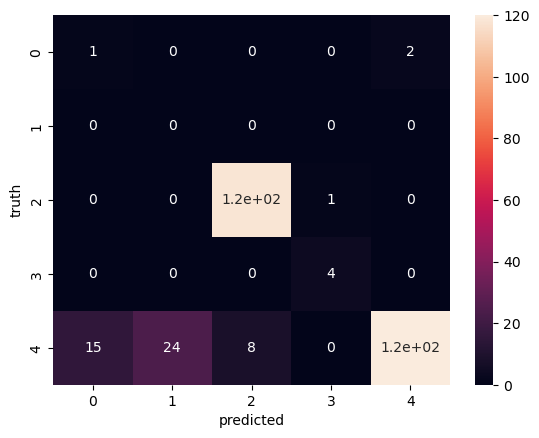

<Figure size 2000x700 with 0 Axes>

In [56]:
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.figure(figsize=(20,7))

# XGB CLASSIFIER

In [57]:
from xgboost import XGBClassifier

In [58]:
model10=XGBClassifier()
model10.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
model10.predict(xtest)

array([4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 1, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2,
       4, 2, 2, 4, 1, 2, 2, 4, 4, 1, 2, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 1, 4, 2, 2,
       2, 4, 4, 2, 1, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4,
       2, 2, 2, 4, 4, 2, 4, 4, 4, 3, 3, 2, 0, 4, 2, 2, 4, 4, 2, 1, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4, 4, 2, 1, 4,
       4, 4, 4, 4, 2, 4, 2, 4, 1, 2, 4, 4, 2, 4, 4, 4, 2, 2, 3, 4, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 0, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 1, 1, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 1,
       2, 3, 4, 4, 4, 2, 4, 4, 2, 4, 2, 1, 2, 2, 1, 4, 1, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 4])

In [60]:
model10.score(xtest,ytest)

0.7781569965870307

# VISUALIZATION

Text(0.5, 1.0, 'Weather Data')

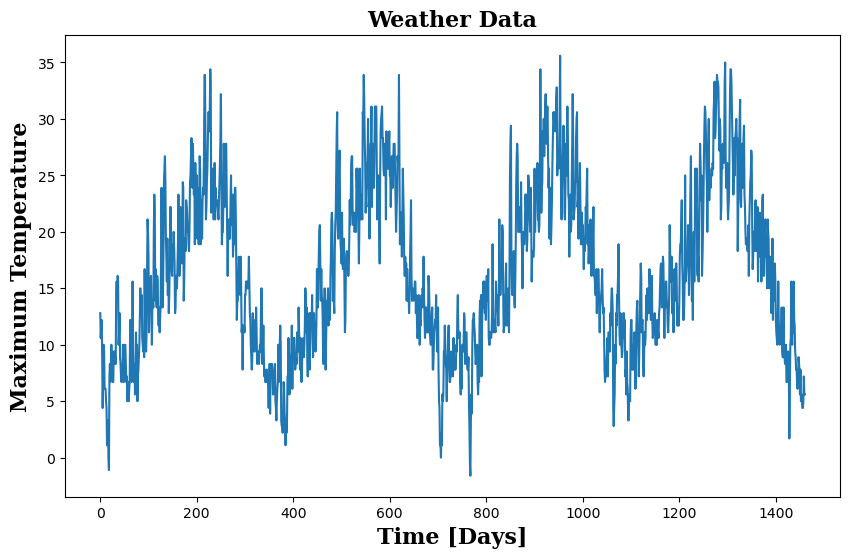

In [61]:
plt.figure(figsize=(10,6))
plt.plot(a['temp_max'])

plt.xlabel('Time [Days]', fontsize=16, fontweight='bold', fontfamily='serif')
plt.ylabel('Maximum Temperature', fontsize=16, fontweight='bold', fontfamily='serif')
plt.title('Weather Data', fontsize=16, fontweight='bold', fontfamily='serif')

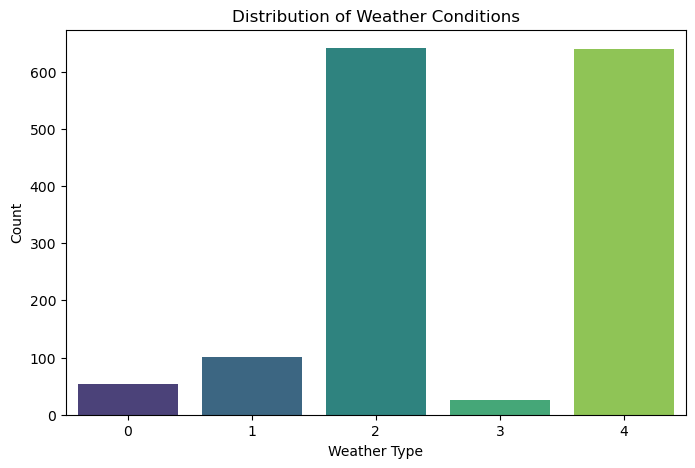

In [62]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x=a["weather"], palette="viridis")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.title("Distribution of Weather Conditions")
plt.show()